In [1]:
 !pip install -q langchain
 !pip install -q langchain_experimental
 !pip install -q langchain-openai

In [2]:
!pip install dotenv

In [5]:
 from google.colab import drive
 drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
 !pip install kaggle

In [7]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'

In [8]:
!kaggle datasets download -d goyaladi/climate-insights-dataset

Dataset URL: https://www.kaggle.com/datasets/goyaladi/climate-insights-dataset
License(s): CC0-1.0
climate-insights-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [9]:
import zipfile

# Define the path to your zip file
file_path = '/content/climate-insights-dataset.zip'
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/kaggle')

In [10]:
import pandas as pd
csv_file='/content/drive/MyDrive/kaggle/climate_change_data.csv'
#creating the document with Pandas.
document = pd.read_csv(csv_file)


In [11]:
document.head(5)

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164


In [12]:
 from langchain.agents.agent_types import AgentType
 from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent
 from langchain_openai import ChatOpenAI
 from langchain_openai import OpenAI

In [16]:
from getpass import getpass

In [17]:
os.environ["OPENAI_API_KEY"] = getpass("OpenAI API Key: ")

OpenAI API Key: ··········


In [18]:
sm_ds_OAI = create_pandas_dataframe_agent(
 OpenAI(temperature=0),
 document,
 verbose=True,
 allow_dangerous_code=True
 )

In [19]:
sm_ds_OAI.invoke("Analyze this data, and write a brief explanation around 100 words.")



> Entering new AgentExecutor chain...
Thought: I should look at the different columns and their values to understand the data.
Action: python_repl_ast
Action Input: df.describe()        Temperature  CO2 Emissions  Sea Level Rise  Precipitation  \
count  10000.000000   10000.000000    10000.000000   10000.000000   
mean      14.936034     400.220469       -0.003152      49.881208   
std        5.030616      49.696933        0.991349      28.862417   
min       -3.803589     182.131220       -4.092155       0.010143   
25%       11.577991     367.109330       -0.673809      24.497516   
50%       14.981136     400.821324        0.002332      49.818967   
75%       18.305826     433.307905        0.675723      74.524991   
max       33.976956     582.899701        4.116559      99.991900   

           Humidity    Wind Speed  
count  10000.000000  10000.000000  
mean      49.771302     25.082066  
std       28.929320     14.466648  
min        0.018998      0.001732  
25%       24.71325

{'input': 'Analyze this data, and write a brief explanation around 100 words.',
 'output': 'The data contains 10,000 rows and 9 columns. The mean temperature is 14.94 degrees, with a standard deviation of 5.03. The mean CO2 emissions is 400.22, with a standard deviation of 49.70. The mean sea level rise is -0.003, with a standard deviation of 0.99. The mean precipitation is 49.88, with a standard deviation of 28.86. The mean humidity is 49.77, with a standard deviation of 28.93. The mean wind speed is 25.08, with a standard deviation of 14.47. This data appears to be a collection of weather data from various locations and countries.'}

In [20]:
sm_ds_OAI.run("""
 Create a line graph with seaborn containing the anual average co2 emissions
in Portugal over the years.
 """)

<ipython-input-20-c1bbd841a859>:1: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  sm_ds_OAI.run("""




> Entering new AgentExecutor chain...
Thought: I need to filter the dataframe to only include rows where the country is Portugal, then group by year and calculate the average co2 emissions for each year.
Action: python_repl_ast
Action Input: df[df['Country'] == 'Portugal'].groupby(df['Date'].dt.year)['CO2 Emissions'].mean()AttributeError: Can only use .dt accessor with datetimelike valuesI need to convert the 'Date' column to a datetime format before using the .dt accessor.
Action: python_repl_ast
Action Input: df['Date'] = pd.to_datetime(df['Date'])NameError: name 'pd' is not definedI need to import the pandas library before using it.
Action: python_repl_ast
Action Input: import pandas as pdI can now use the .dt accessor to group by year and calculate the average co2 emissions for each year.
Action: python_repl_ast
Action Input: df[df['Country'] == 'Portugal'].groupby(df['Date'].dt.year)['CO2 Emissions'].mean()AttributeError: Can only use .dt accessor with datetimelike values I need

'A line graph with seaborn containing the annual average co2 emissions in Portugal over the years.'



> Entering new AgentExecutor chain...
Thought: I need to filter the dataframe to only include rows where the country is Portugal, then group by year and calculate the average co2 emissions for each year.
Action: python_repl_ast
Action Input: df[df['Country'] == 'Portugal'].groupby(df['Date'].dt.year)['CO2 Emissions'].mean()Date
2001    392.366744
2002    361.318039
2003    429.532019
2005    355.446394
2007    469.185425
2008    374.903280
2009    419.916143
2011    370.501877
2012    329.854122
2013    360.832728
2015    498.653416
2017    505.814590
2018    380.283094
2019    435.799370
2020    401.736774
2022    416.516142
Name: CO2 Emissions, dtype: float64 I need to plot this data using seaborn.
Action: python_repl_ast
Action Input: sns.lineplot(x='Date', y='CO2 Emissions', data=df[df['Country'] == 'Portugal'].groupby(df['Date'].dt.year)['CO2 Emissions'].mean())NameError: name 'sns' is not defined I need to import seaborn.
Action: python_repl_ast
Action Input: import seaborn as 

'A line graph with seaborn containing the annual average co2 emissions in Portugal over the years.'

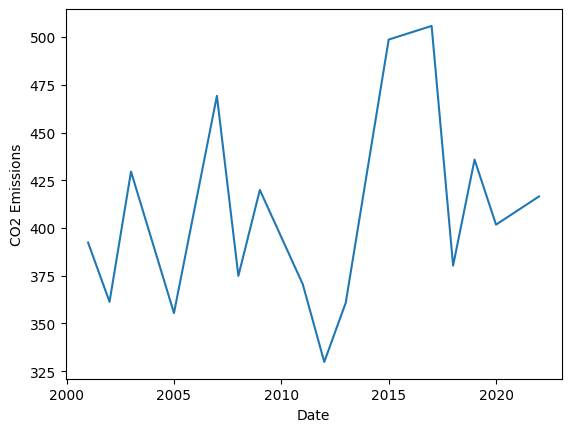

In [21]:
sm_ds_OAI.run("""
 Create a line graph with seaborn containing the anual average co2 emissions
in Portugal over the years. I could not see the graph earlier
 """)

In [22]:
sm_ds_OAI.run("""
 Can you identity any outliers in the dataset

 """)



> Entering new AgentExecutor chain...
Thought: I should use descriptive statistics to identify any outliers.
Action: python_repl_ast
Action Input: df.describe()                      Date   Temperature  CO2 Emissions  Sea Level Rise  \
count                10000  10000.000000   10000.000000    10000.000000   
mean   2011-07-02 00:00:00     14.936034     400.220469       -0.003152   
min    2000-01-01 00:00:00     -3.803589     182.131220       -4.092155   
25%    2005-10-01 00:00:00     11.577991     367.109330       -0.673809   
50%    2011-07-02 00:00:00     14.981136     400.821324        0.002332   
75%    2017-04-01 00:00:00     18.305826     433.307905        0.675723   
max    2022-12-31 00:00:00     33.976956     582.899701        4.116559   
std                    NaN      5.030616      49.696933        0.991349   

       Precipitation      Humidity    Wind Speed  
count   10000.000000  10000.000000  10000.000000  
mean       49.881208     49.771302     25.082066  
min      

"The potential outliers are in the 'Temperature', 'CO2 Emissions', and 'Sea Level Rise' columns."

In [23]:
sm_ds_OAI.run("""
 After identifying the outlier, can you remove them using grubb test"""
)



> Entering new AgentExecutor chain...
Thought: I need to use the grubb test to identify the outlier and then remove it from the dataframe.
Action: python_repl_ast
Action Input: df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]NameError: name 'np' is not definedI need to import the numpy library to use the zscore function.
Action: python_repl_ast
Action Input: import numpy as npI now have access to the numpy library and can use the zscore function.
Action: python_repl_ast
Action Input: df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]NameError: name 'stats' is not defined I need to import the stats module from the scipy library to use the zscore function.
Action: python_repl_ast
Action Input: from scipy import stats I now have access to the stats module and can use the zscore function.
Action: python_repl_ast
Action Input: df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]TypeError: unsupported operand type(s) for +: 'Timestamp' and 'Timestamp' The zscore function cannot be appli

"df = df[(np.abs(stats.zscore(df.drop('Date', axis=1))) < 3).all(axis=1)]"